# Auswertung der Messungen

In [46]:
import json
import glob
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

folder = "./../testresults/*.json"

file_list = glob.glob(folder)

data_array = []

    
for file in file_list:
    with open(file) as f:
        json_data = json.load(f)
    row_dataframe = pd.json_normalize(json_data)
    percentiles_dataframe = pd.json_normalize(json_data['DurationHistogram']['Percentiles'])
    
    if "ErrorsDurationHistogram" in json_data:
        if json_data["ErrorsDurationHistogram"]["Count"] != 0:
            errors_percentiles_dataframe = pd.json_normalize(json_data['ErrorsDurationHistogram']['Percentiles'])
            row_dataframe['Errors50Percentile'] = errors_percentiles_dataframe[errors_percentiles_dataframe["Percentile"] == 50.0]['Value'] 
            row_dataframe['Errors90Percentile'] = errors_percentiles_dataframe.loc[2]['Value']

    row_dataframe['90Percentile'] = percentiles_dataframe.loc[2]['Value']
    row_dataframe['50Percentile'] = percentiles_dataframe[percentiles_dataframe["Percentile"] == 50.0]['Value']
   
    data_array.append(row_dataframe)

data = pd.concat(data_array, ignore_index=True)

relevant_testdate_df = data

relevant_testdate_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile|StartTime").sort_values(by=['StartTime'])

,Labels,StartTime,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
26,normal-without-cb,2022-06-30T18:26:40.58767165Z,1200,0,1200.0,0.058316,NaN,NaN,NaN,NaN
49,perm-error-without-cb,2022-06-30T18:29:16.079436887Z,1200,1200,NaN,0.016435,1200.0,NaN,0.016435,NaN
6,perm-overload-without-cb,2022-06-30T18:31:54.034777628Z,411,6,405.0,0.988816,NaN,NaN,5.282018,6.0
119,trans-error-without-cb,2022-06-30T18:34:30.417066473Z,1200,400,800.0,0.031100,400.0,NaN,0.015714,NaN
130,trans-overload-without-cb,2022-06-30T18:37:06.097116012Z,1200,0,1200.0,0.055222,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14,perm-overload-t3-r4j-nfa-4,2022-07-10T11:30:42.902272106Z,1200,1199,1.0,0.008310,NaN,1199.0,0.008306,NaN
50,trans-error-t3-r4j-nfa-4,2022-07-10T11:33:48.2915738Z,1200,648,552.0,0.014000,55.0,593.0,0.007530,NaN
39,trans-overload-t3-r4j-nfa-4,2022-07-10T11:36:53.940025969Z,1200,600,600.0,0.015379,NaN,600.0,0.007333,NaN
82,spor-error-t3-r4j-nfa-4,2022-07-10T11:39:59.259877055Z,1200,1191,9.0,0.008048,20.0,1171.0,0.008021,NaN


## Auswertung - Normales Verhalten

In [47]:
normal_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("normal")]
normal_df = normal_df.fillna(0.0)
#normal_df['Labels'] = normal_df['Labels'].replace({'normal':'','with-config-traefik-cb':'traefik','with-r4j-cb':'r4j','without-cb':'none','with-default-traefik':'df-traefik'},regex=True)
normal_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
0,normal-t3-r4j-nfa-2,1200,0,1200.0,0.037244,0.0,0.0,0.000000,0.0
7,normal-pre-test-r4j-with-both,1200,0,1200.0,0.032195,0.0,0.0,0.000000,0.0
17,normal-t-with-default-traefik,1200,0,1200.0,0.029184,0.0,0.0,0.000000,0.0
23,normal-t-traefik-3-avg-res,1200,0,1200.0,0.028292,0.0,0.0,0.000000,0.0
24,normal-t-traefik-4-90-res,1200,0,1200.0,0.028306,0.0,0.0,0.000000,0.0
26,normal-without-cb,1200,0,1200.0,0.058316,0.0,0.0,0.000000,0.0
29,normal-istio3-maxPenReq,1200,0,1200.0,0.031928,0.0,0.0,0.000000,0.0
31,normal-t3-r4j-default,1200,0,1200.0,0.034982,0.0,0.0,0.000000,0.0
43,normal-t3-r4j-nfa-3,1200,0,1200.0,0.035659,0.0,0.0,0.000000,0.0
51,normal-istio2-maxReq,688,342,346.0,0.018759,0.0,342.0,0.007273,0.0


## Auswertung - Permanente Fehler

Testskript: Fehler im Testskript bei R4J, ist korrigiert, Testläufe müssen nachgeholt werden

In [48]:
perm_error_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("perm-error")]
perm_error_df = perm_error_df.fillna(0.0)
perm_error_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile|90Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,90Percentile,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,Errors90Percentile,RetCodes.-1
1,perm-error-t3-r4j-nfa-3,1200,1200,0.0,0.015672,0.010144,25.0,1175.0,0.010144,0.015672,0.0
9,perm-error-t-traefik-1-consErrors,1200,1200,0.0,0.030806,0.015937,1200.0,0.0,0.015937,0.030806,0.0
19,perm-error-t-traefik-3-avg-res,1200,1200,0.0,0.025000,0.013747,1200.0,0.0,0.013747,0.025000,0.0
21,perm-error-pre-test-r4j-with-both,1200,1200,0.0,0.015790,0.010366,21.0,1179.0,0.010366,0.015790,0.0
27,perm-error-istio3-maxPenReq,1200,1200,0.0,0.019532,0.014548,1200.0,0.0,0.014548,0.019532,0.0
35,perm-error-t3-r4j-nfa-1,1200,1200,0.0,0.016302,0.010817,24.0,1176.0,0.010817,0.016302,0.0
45,perm-error-istio5-both,1200,1200,0.0,0.011121,0.006423,11.0,1189.0,0.006423,0.011121,0.0
49,perm-error-without-cb,1200,1200,0.0,0.031735,0.016435,1200.0,0.0,0.016435,0.031735,0.0
52,perm-error-t-without-cb,1200,1200,0.0,0.017850,0.009394,1200.0,0.0,0.009394,0.017850,0.0
68,perm-error-t3-r4j-nfa-4,1200,1200,0.0,0.015196,0.010015,23.0,1177.0,0.010015,0.015196,0.0


## Auswertung - Permanete Überlast

Testskript: läuft, wie erwartet
Testläufe: Testlaufe ohne CB hat nicht stattgefunden

In [49]:
perm_overload_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("perm-overload")]
perm_overload_df =perm_overload_df.fillna(0.0)
perm_overload_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
6,perm-overload-without-cb,411,6,405.0,0.988816,0.0,0.0,5.282018,6.0
10,perm-overload-istio2-maxReq,1173,786,387.0,0.012478,0.0,785.0,0.005500,1.0
11,perm-overload-t-traefik-4-all,1200,1183,17.0,0.005809,0.0,1183.0,0.005732,0.0
14,perm-overload-t3-r4j-nfa-4,1200,1199,1.0,0.008310,0.0,1199.0,0.008306,0.0
18,perm-overload-t3-r4j-nfa-1,1200,1140,60.0,0.010138,0.0,1140.0,0.009831,0.0
33,perm-overload-t-without-cb,512,0,512.0,0.905607,0.0,0.0,0.000000,0.0
42,perm-overload-t-traefik-2-err-duration,589,40,549.0,0.841797,0.0,40.0,0.003889,0.0
44,perm-overload-t3-r4j-nfa-2,1200,1200,0.0,0.010289,0.0,1200.0,0.010289,0.0
83,perm-overload-t3-r4j-nfa-3,1200,1191,9.0,0.008966,0.0,1191.0,0.008927,0.0
84,perm-overload-t-traefik-3-avg-res,1200,1011,189.0,0.007195,0.0,1011.0,0.006098,0.0


## Auswertung - Transiente Fehler
Testskript: läuft
Testläufe: Abgebrochene / Falsche Testfälle dabei (Date-Problem)

In [50]:
trans_error_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("trans-error")]
trans_error_df = trans_error_df.fillna(0.0)
trans_error_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
12,trans-error-istio4-maxCon,1200,400,800.0,0.030720,400.0,0.0,0.017180,0.0
36,trans-error-t-traefik-2-err-duration,1200,436,764.0,0.024714,58.0,378.0,0.007583,0.0
46,trans-error-t-without-cb,1200,400,800.0,0.025128,400.0,0.0,0.009585,0.0
50,trans-error-t3-r4j-nfa-4,1200,648,552.0,0.014000,55.0,593.0,0.007530,0.0
58,trans-error-istio2-maxReq,1200,799,401.0,0.016178,205.0,594.0,0.009233,0.0
59,trans-error-t-traefik-4-all,1200,603,597.0,0.018143,62.0,541.0,0.006623,0.0
60,trans-error-t-with-default-traefik,1200,400,800.0,0.026240,400.0,0.0,0.013349,0.0
67,trans-error-pre-test-r4j-with-both,1200,652,548.0,0.013595,57.0,595.0,0.008516,0.0
70,trans-error-t3-r4j-nfa-3,1200,648,552.0,0.015059,55.0,593.0,0.008934,0.0
74,trans-error-t-traefik-1-consErrors,1200,400,800.0,0.027062,400.0,0.0,0.014308,0.0


## Auswertung - Transiente Überlast

In [51]:
trans_overload_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("trans-overload")]
trans_overload_df = trans_overload_df.fillna(0.0)
trans_overload_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
2,trans-overload-t-traefik-4-all,1200,390,810.0,0.026134,0.0,390.0,0.006725,0.0
3,trans-overload-pre-test-r4j-with-both,1200,896,304.0,0.009747,0.0,896.0,0.008271,0.0
4,trans-overload-istio4-maxCon,1200,0,1200.0,0.040347,0.0,0.0,0.000000,0.0
5,trans-overload-t3-r4j-nfa-3,1200,300,900.0,0.025970,0.0,300.0,0.008317,0.0
13,trans-overload-t-traefik-4-90-res,1200,390,810.0,0.025363,0.0,390.0,0.006095,0.0
30,trans-overload-istio3-maxPenReq,1200,0,1200.0,0.037621,0.0,0.0,0.000000,0.0
38,trans-overload-istio1-consErrors,1200,0,1200.0,0.038885,0.0,0.0,0.000000,0.0
39,trans-overload-t3-r4j-nfa-4,1200,600,600.0,0.015379,0.0,600.0,0.007333,0.0
41,trans-overload-t-with-default-traefik,1200,0,1200.0,0.041929,0.0,0.0,0.000000,0.0
48,trans-overload-t-traefik-1-consErrors,1200,0,1200.0,0.040625,0.0,0.0,0.000000,0.0


## Auswertung - Sporadische Fehler

In [52]:
spor_error_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("spor-error")]
spor_error_df = spor_error_df.fillna(0.0)
spor_error_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
8,spor-error-istio5-both,1200,1193,7.0,0.006532,11.0,1182.0,0.006504,0.0
20,spor-error-t-traefik-3-avg-res,1200,708,492.0,0.017407,708.0,0.0,0.011754,0.0
22,spor-error-t-traefik-2-err-duration,1200,1142,58.0,0.005310,89.0,1053.0,0.005079,0.0
25,spor-error-t3-r4j-nfa-2,1200,1188,12.0,0.007283,20.0,1168.0,0.007233,0.0
32,spor-error-istio4-maxCon,1200,746,454.0,0.018140,746.0,0.0,0.013726,0.0
47,spor-error-t-traefik-1-consErrors,1200,721,479.0,0.017759,721.0,0.0,0.011794,0.0
54,spor-error-t3-r4j-nfa-3,1200,1188,12.0,0.006938,15.0,1173.0,0.006904,0.0
56,spor-error-t-traefik-4-90-res,1200,715,485.0,0.016615,715.0,0.0,0.010360,0.0
57,spor-error-t-without-cb,1200,710,490.0,0.013231,710.0,0.0,0.007934,0.0
61,spor-error-istio1-consErrors,1200,1183,17.0,0.005856,31.0,1152.0,0.005795,0.0


## Auswertung - Sporadische Überlast

In [53]:
spor_overload_df = relevant_testdate_df[relevant_testdate_df['Labels'].str.contains("spor-overload")]
spor_overload_df = spor_overload_df.fillna(0.0)
spor_overload_df.filter(regex="Label|RetCodes.*|DurationHistogram.Count|50Percentile")

,Labels,DurationHistogram.Count,ErrorsDurationHistogram.Count,RetCodes.200,50Percentile,RetCodes.500,RetCodes.503,Errors50Percentile,RetCodes.-1
15,spor-overload-without-cb,1200,0,1200.0,0.208636,0.0,0.0,0.000000,0.0
16,spor-overload-istio1-consErrors,1200,0,1200.0,0.208445,0.0,0.0,0.000000,0.0
28,spor-overload-t3-r4j-nfa-3,1200,0,1200.0,0.209500,0.0,0.0,0.000000,0.0
34,spor-overload-t-traefik-4-90-res,1200,1106,94.0,0.006227,0.0,1106.0,0.005780,0.0
37,spor-overload-t-traefik-3-avg-res,1200,775,425.0,0.008902,0.0,775.0,0.006517,0.0
40,spor-overload-t-traefik-1-consErrors,1200,0,1200.0,0.208297,0.0,0.0,0.000000,0.0
66,spor-overload-t-without-cb,1200,0,1200.0,0.209655,0.0,0.0,0.000000,0.0
69,spor-overload-t-traefik-2-err-duration,1200,50,1150.0,0.206747,0.0,50.0,0.005417,0.0
75,spor-overload-pre-test-r4j-with-both,1200,1172,28.0,0.007430,0.0,1172.0,0.007314,0.0
79,spor-overload-t3-r4j-default,1200,1,1199.0,0.209664,0.0,1.0,0.004451,0.0


## Export der Diagramme und Rohdaten je Testfall

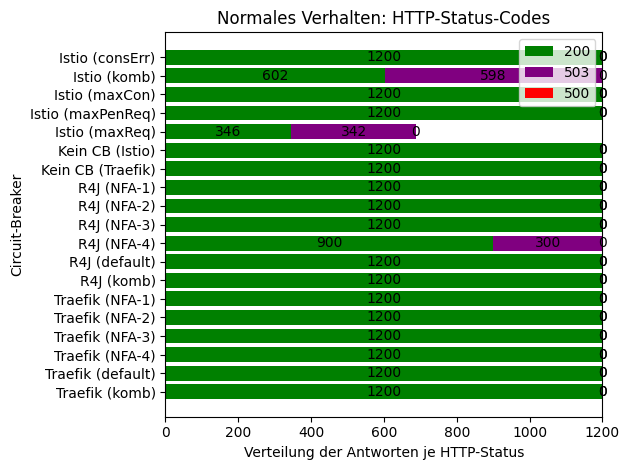

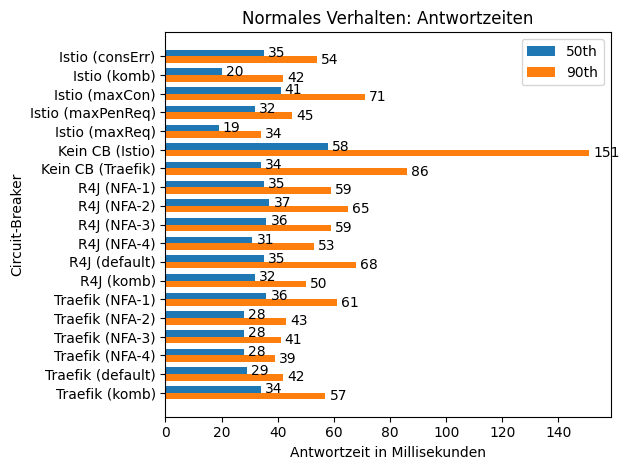

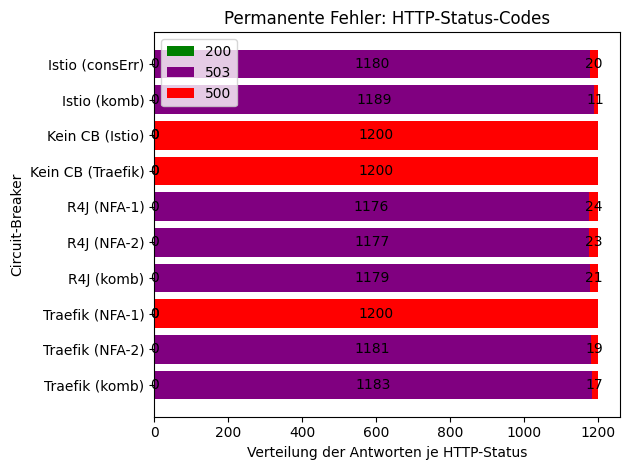

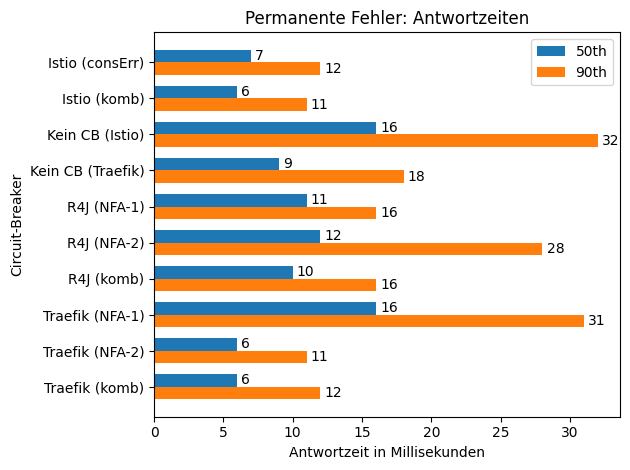

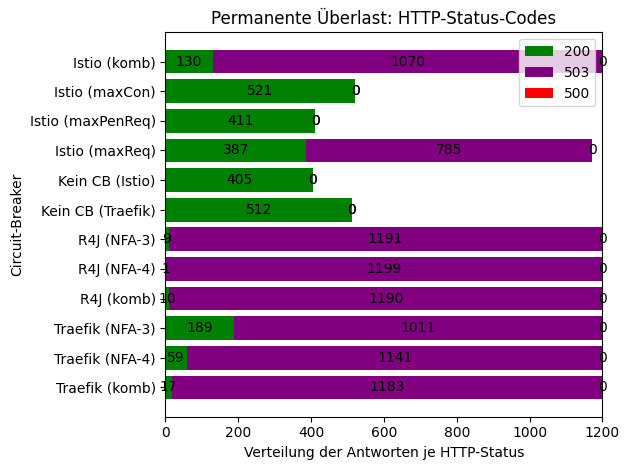

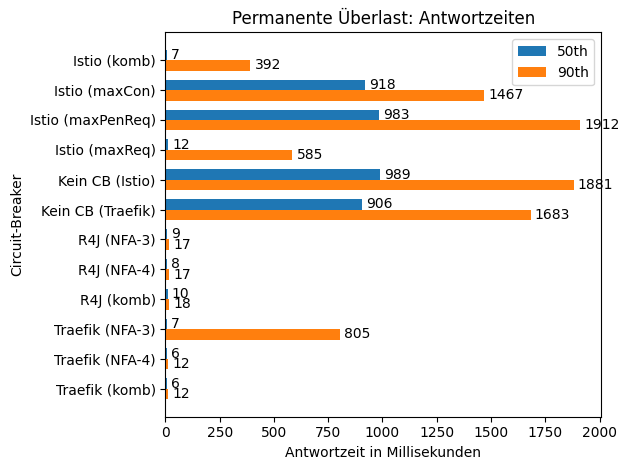

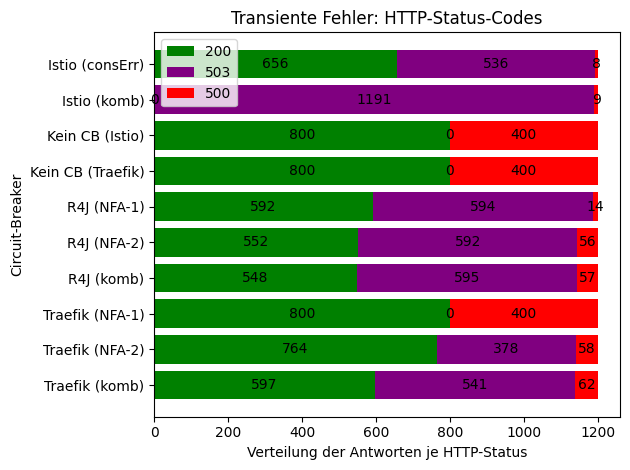

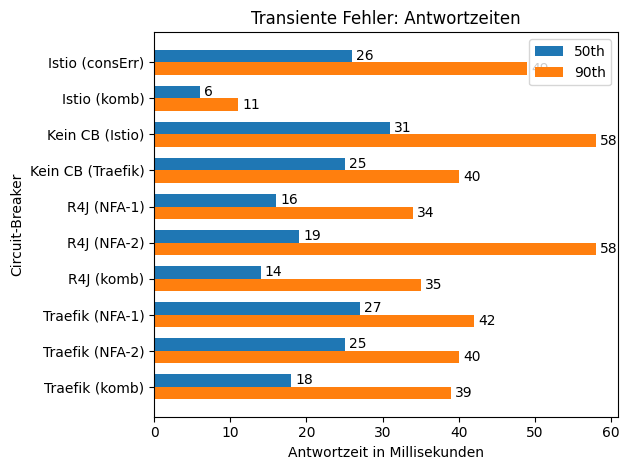

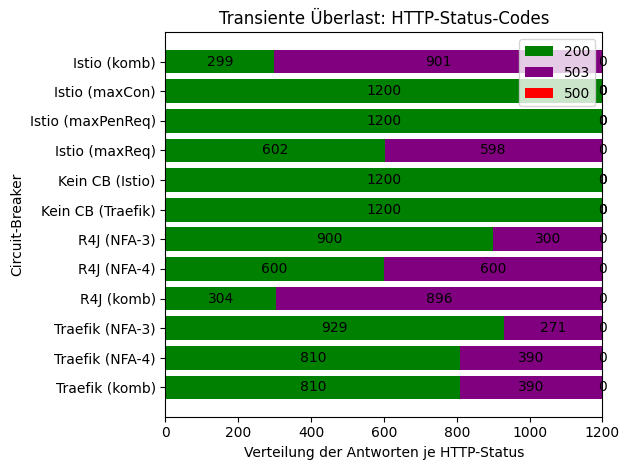

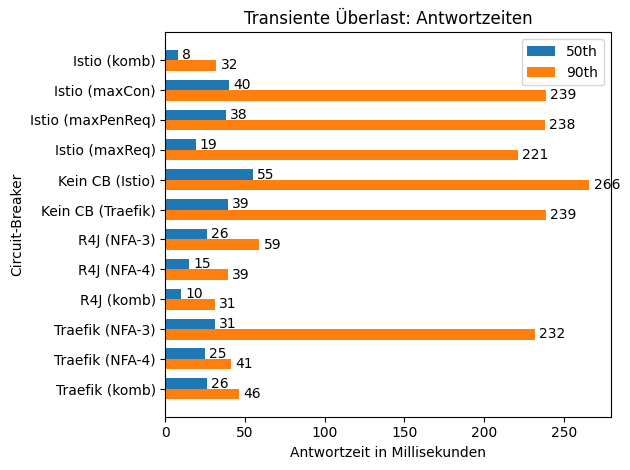

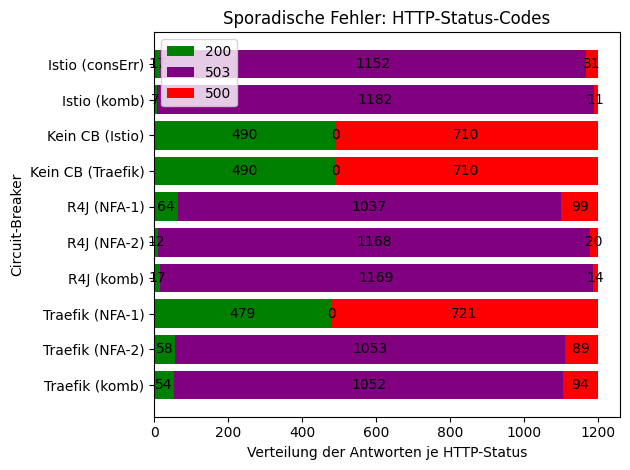

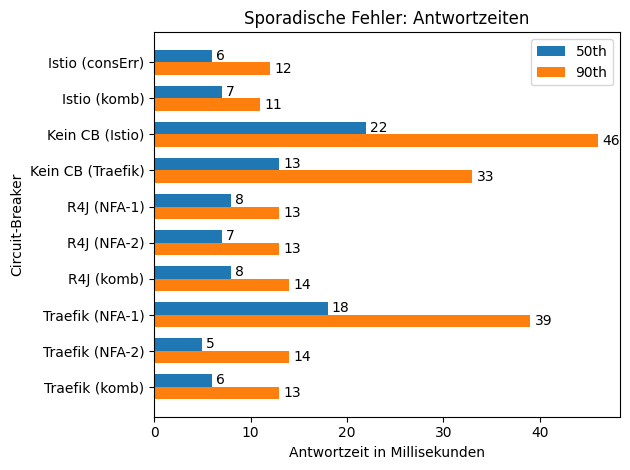

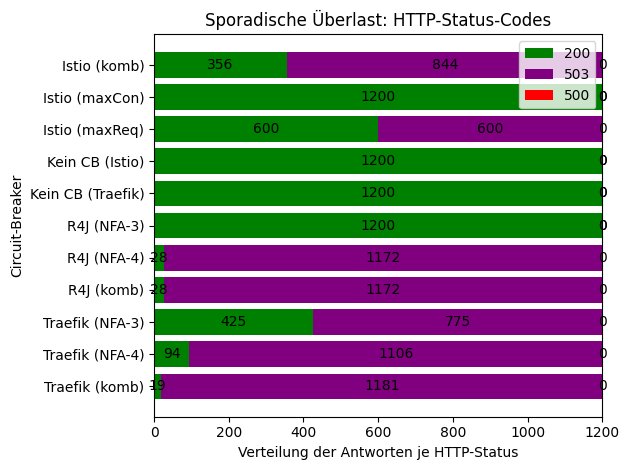

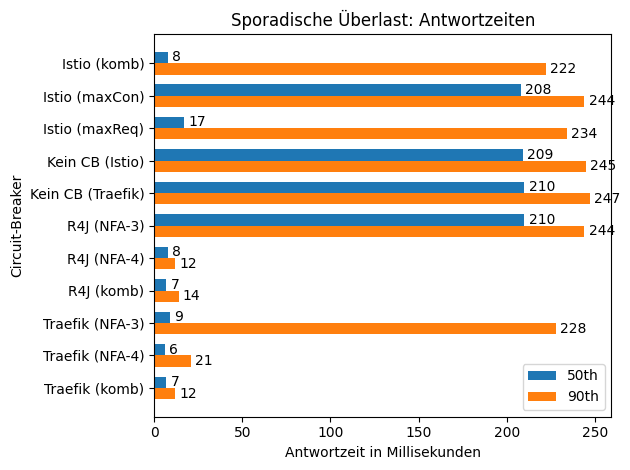

In [54]:
def exportRetCodeDiagramm(diagramm_df, filename, title):
    mpl.style.use('seaborn')
    plt.rcdefaults()
    mpl.rcParams.update({'figure.autolayout': True})
    
    N = diagramm_df.shape[0]
    ind = np.arange(N)   
    width = 0.8 
    
    fig, ax = plt.subplots()
    
    p1 = ax.barh(ind, list(diagramm_df['RetCodes.200']), width, left=0, label='200',color="green")
    p2 = ax.barh(ind, list(diagramm_df['RetCodes.503']), width, left=list(diagramm_df['RetCodes.200']), label='503', color="purple")
    p3 = ax.barh(ind, list(diagramm_df['RetCodes.500']), width, left=list(diagramm_df['RetCodes.200']+diagramm_df['RetCodes.503']), label='500', color="red")
    ax.set_yticks(ind, labels=diagramm_df['Labels'])
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Verteilung der Antworten je HTTP-Status')
    ax.set_ylabel('Circuit-Breaker')
    ax.set_title(title)
    
    ax.bar_label(p1, label_type="center")
    ax.bar_label(p2,label_type="center")
    ax.bar_label(p3, label_type="center")
    ax.legend()
    
    fig.savefig(filename)
    
def exportRespTimeDiagramm(diagramm_df, filename, title):
    labels = diagramm_df['Labels']
    ind = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    diagramm_df['50Percentile'] = np.round(diagramm_df['50Percentile']*1000)
    diagramm_df['90Percentile'] = np.round(diagramm_df['90Percentile']*1000)
    fig, ax = plt.subplots()
    rects1 = ax.barh(ind - width/2, list(diagramm_df['50Percentile']), width, label='50th')
    rects3 = ax.barh(ind + width/2, list(diagramm_df['90Percentile']), width, label='90th')

    ax.legend()
    ax.set_yticks(ind, labels=diagramm_df['Labels'])
    
    #ax.set_xscale('log')

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects3, padding=3)
    ax.invert_yaxis()
    ax.set_xlabel('Antwortzeit in Millisekunden')
    ax.set_ylabel('Circuit-Breaker')
    ax.set_title(title)

    fig.savefig(filename)
    
def generateAndExporteTestcaseData(df_to_export, testcase_prefix, prefix_number, title_prefix, only_relevant_labels=None):
    #df_to_export[df_to_export['Labels'].str.contains(testcase_prefix)]
    #df_to_export = df_to_export.fillna(0.0)
    df_to_export['Labels'] = df_to_export['Labels'].replace({testcase_prefix + '-':''},regex=True)
    #Ersetzen der Labels durch sprechendere Namen
    if only_relevant_labels is not None:
        df_to_export = df_to_export[df_to_export['Labels'].isin(only_relevant_labels)].copy()
        
    df_to_export['Labels'].replace({'istio1-consErrors':'Istio (consErr)',
                                                             'istio2-maxReq':'Istio (maxReq)',
                                                             'istio3-maxPenReq':'Istio (maxPenReq)',
                                                             'istio4-maxCon':'Istio (maxCon)',
                                                             'istio5-both':'Istio (komb)',
                                                             't3-r4j-default':'R4J (default)',
                                                             't3-r4j-nfa-1':'R4J (NFA-1)',
                                                             't3-r4j-nfa-2':'R4J (NFA-2)',
                                                             't3-r4j-nfa-3':'R4J (NFA-3)',
                                                             't3-r4j-nfa-4':'R4J (NFA-4)',
                                                             'pre-test-r4j-with-both':'R4J (komb)',
                                                             't-traefik-1-consErrors':'Traefik (NFA-1)',
                                                             't-traefik-2-err-duration':'Traefik (NFA-2)',
                                                             't-traefik-3-avg-res':'Traefik (NFA-3)',
                                                             't-traefik-4-90-res':'Traefik (NFA-4)',
                                                             't-traefik-4-all':'Traefik (komb)',
                                                             't-with-default-traefik':'Traefik (default)',
                                                             't-without-cb':'Kein CB (Traefik)',
                                                             'without-cb':'Kein CB (Istio)'  
                                                            },regex=True,inplace=True)
    df_to_export = df_to_export.sort_values(by='Labels')
    exportRetCodeDiagramm(df_to_export, "evaluationresults/" + prefix_number + "a-" + testcase_prefix + "-retcodes.pdf",title_prefix + ": HTTP-Status-Codes")
    exportRespTimeDiagramm(df_to_export, "evaluationresults/" + prefix_number + "b-" + testcase_prefix + "-resp-time.pdf",title_prefix + ": Antwortzeiten")
    df_to_export.filter(regex="Label|StartTime|RetCodes.*|DurationHistogram.Count|50Percentile|90Percentile").to_csv("evaluationresults/" +prefix_number + "-" + testcase_prefix +"-rohdaten.csv")

#Ohne Defaults, bei Erros nur NFA-1 und NFA-2 und All und bei Overload nur NFA-3, NFA-4 und All       
errors_relevant = ['istio1-consErrors', 't3-r4j-nfa-1','istio5-both','t3-r4j-nfa-2','pre-test-r4j-with-both','t-without-cb','without-cb','t-traefik-1-consErrors','t-traefik-2-err-duration','t-traefik-4-all']
overload_relevant = ['istio2-maxReq', 'istio3-maxPenReq','istio4-maxCon','istio5-both','t3-r4j-nfa-3','t3-r4j-nfa-4','pre-test-r4j-with-both','t-traefik-3-avg-res','t-traefik-4-90-res','t-traefik-4-all','t-without-cb','without-cb']
generateAndExporteTestcaseData(normal_df,"normal","1","Normales Verhalten")


generateAndExporteTestcaseData(perm_error_df,"perm-error","2","Permanente Fehler",errors_relevant)

generateAndExporteTestcaseData(perm_overload_df,"perm-overload","3","Permanente Überlast",overload_relevant)

generateAndExporteTestcaseData(trans_error_df,"trans-error","4","Transiente Fehler",errors_relevant)

generateAndExporteTestcaseData(trans_overload_df,"trans-overload","5","Transiente Überlast",overload_relevant)

generateAndExporteTestcaseData(spor_error_df,"spor-error","6","Sporadische Fehler",errors_relevant)

generateAndExporteTestcaseData(spor_overload_df,"spor-overload","7","Sporadische Überlast",overload_relevant)